In [2]:
# !pip install numpy pandas scipy matplotlib seaborn 

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика подсчета статистик и формулирования гипотез
»</b></h3>


In [3]:
import numpy as np  
import pandas as pd  # для работы с таблицами

from scipy import stats # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

# Датасет с характеристиками автомобилей

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/CarPrice_Assignment.csv')
print("Размер нашего датасета: {}".format(data.shape))
data.head()

Размер нашего датасета: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<div class="alert alert-info">

<b>Про датасет: </b>
    
В датасет были собраны характеристики по машинами разных марок. Собрано около 26 характеристик машины, в том числе ее рыночная стоимость при продаже или покупке. Первоначальная цель датасета была в предсказании цены автомобиля по его описанию.  


</div>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<div class="alert alert-info">

    
Рассмотрим самый интересный столбец с <b> ценой на машины </b> - это столбец `price`

</div>




# Полезные статистики - среднее, медиана, дисперсия

In [6]:
# Среднее
data['price'].mean()

np.float64(13276.710570731706)

In [7]:
# медиана
data['price'].median()

np.float64(10295.0)

In [8]:
# дисперсия
data['price'].var()

np.float64(63821761.57839796)

In [9]:
# сумма
data['price'].sum()

np.float64(2721725.667)

In [10]:
# Колличество элементов
len(data['price'])

205

In [11]:
data['price'].sum()/len(data['price'])

np.float64(13276.710570731706)

In [12]:
data['citympg'].std()

np.float64(6.542141653001622)

In [13]:
print(data['citympg'])
print(data['citympg'].mean())
print(data['citympg'].std()) #kv koren dispersiya

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: citympg, Length: 205, dtype: int64
25.21951219512195
6.542141653001622


<div class="alert alert-info">

Этим список не ограничевается!

# Способы визуализации распределения данных 

## Гистограммы

<Axes: ylabel='Frequency'>

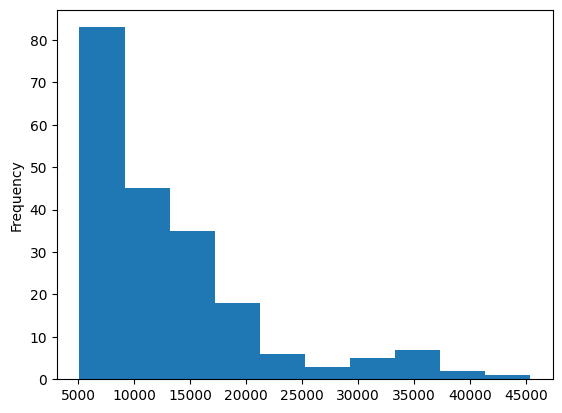

In [14]:
data['price'].plot.hist()

In [15]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: ylabel='Frequency'>

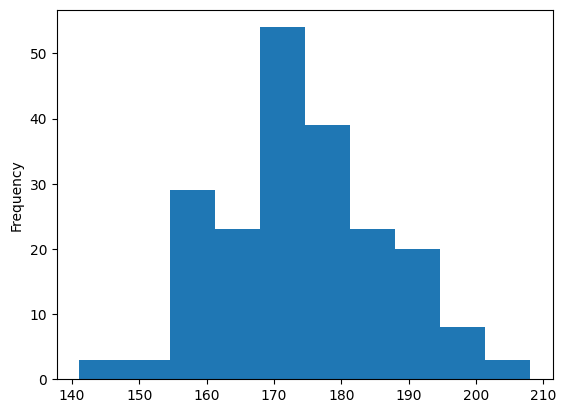

In [16]:
data['carlength'].plot.hist()

<Axes: >

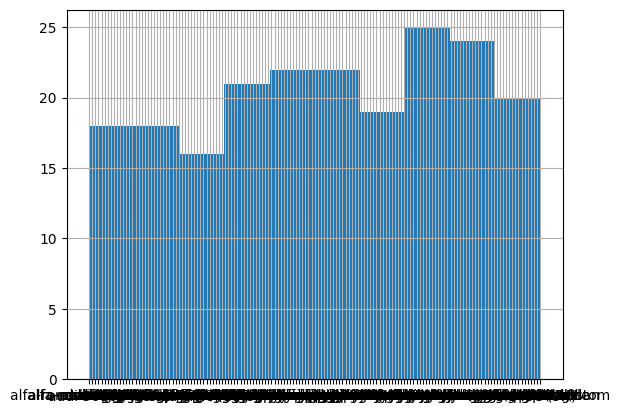

In [17]:
data['CarName'].hist()

In [18]:
data['CarName'].value_counts()

CarName
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
volkswagen super beetle     1
volkswagen rabbit custom    1
volvo 245                   1
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64

In [19]:
for car_name, car_cnt in zip(data['CarName'].value_counts().index, data['CarName'].value_counts().values):
    print(car_name, '-', car_cnt)

peugeot 504 - 6
toyota corolla - 6
toyota corona - 6
subaru dl - 4
mitsubishi outlander - 3
mazda 626 - 3
honda civic - 3
mitsubishi mirage g4 - 3
mitsubishi g4 - 3
toyota mark ii - 3
nissan clipper - 2
honda civic cvcc - 2
honda accord - 2
mazda glc - 2
mazda rx-7 gs - 2
mazda glc deluxe - 2
bmw x3 - 2
bmw 320i - 2
audi 100ls - 2
volvo 264gl - 2
volvo 144ea - 2
volvo 244dl - 2
toyota starlet - 2
volvo 145e (sw) - 2
subaru - 2
toyota corolla 1200 - 2
saab 99e - 2
peugeot 604sl - 2
saab 99le - 2
saab 99gle - 2
nissan rogue - 2
nissan latio - 2
mazda rx-4 - 2
isuzu D-Max  - 2
volkswagen dasher - 2
porsche cayenne - 2
plymouth fury iii - 2
toyota corolla liftback - 2
chevrolet impala - 1
bmw x5 - 1
bmw x4 - 1
bmw z4 - 1
bmw x1 - 1
audi 100 ls - 1
audi 5000s (diesel) - 1
audi 4000 - 1
audi 5000 - 1
audi fox - 1
alfa-romero giulia - 1
alfa-romero stelvio - 1
alfa-romero Quadrifoglio - 1
dodge rampage - 1
chevrolet vega 2300 - 1
chevrolet monte carlo - 1
isuzu D-Max V-Cross - 1
mazda glc 4 -

In [20]:
# добавим параметров. Взможные параметры можно увидеть с помощью команды Shift + tab

<Axes: ylabel='Frequency'>

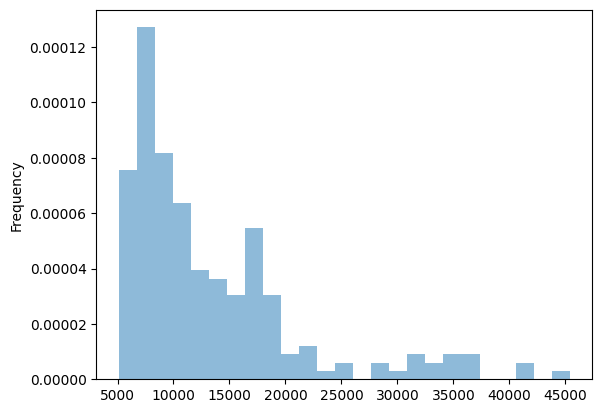

In [21]:
data['price'].plot.hist(bins=25, alpha=0.5, density=True)

## Боксплот - Ящики с усами. 

### Где тут усы? Где тут выбросы?

<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild3366-6434-4530-a163-613065363237/boxplot.jpg"  width=1000></p>



<div class="alert alert-info">

    
**Выброс** — это такая точка, которая существенно отличается от большинства значений, взятых из выборки или совокупности. Есть множество возможных причин появления выбросов и вот для начала только несколько:

* Естественные выбросы данных.
* Изменение поведения наблюдаемой системы.
* Ошибки при сборе данных.

{'whiskers': [<matplotlib.lines.Line2D at 0x1dce9cfac00>,
 'caps': [<matplotlib.lines.Line2D at 0x1dcea043fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dcea043a70>],
 'medians': [<matplotlib.lines.Line2D at 0x1dcea078500>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dcea0787a0>],
 'means': []}

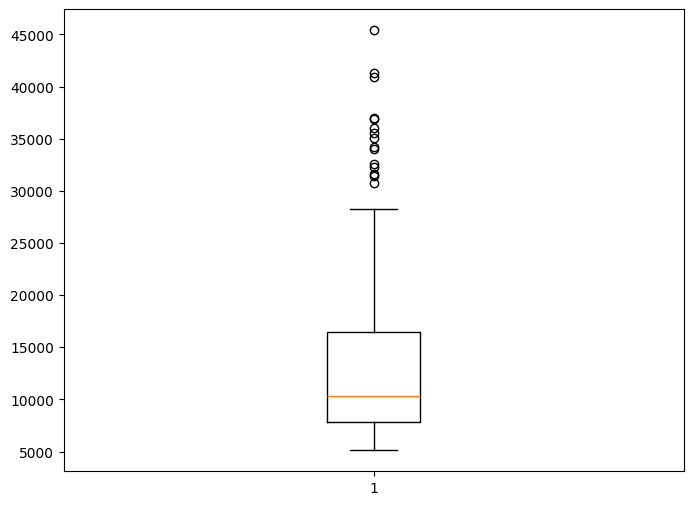

In [22]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['price'])

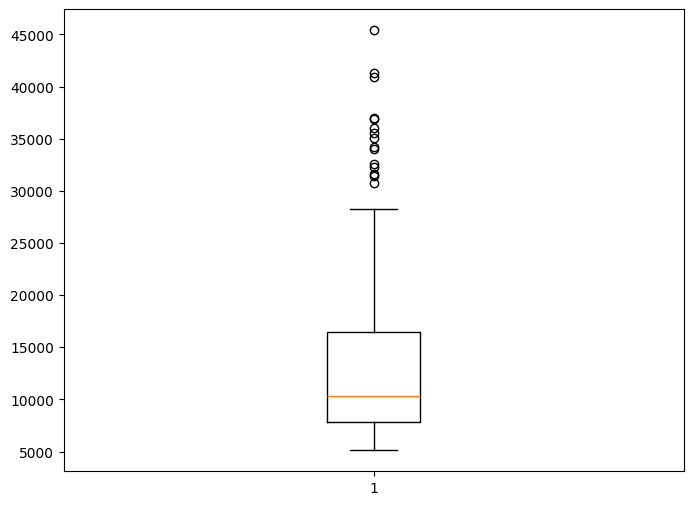

In [23]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['price']); # ; убирает ненужные пояснения

# Как доказать гипотезу, что цена на топливо зависит от типа топлива?

<Axes: xlabel='fueltype', ylabel='price'>

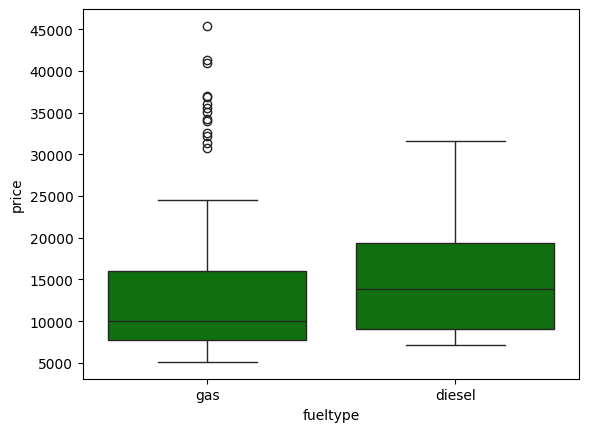

In [24]:
sns.boxplot(data = data, y = 'price', color='g', x = 'fueltype')

In [25]:
def my_func(x):    
    return max(x)

data.groupby('fueltype', as_index=False).agg({'price':'mean',
                                              'horsepower': my_func,
                                              })

,fueltype,price,horsepower
0,diesel,15838.1500,123
1,gas,12999.7982,288


<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild6533-3362-4632-b632-333165363837/image.png"  width=900></p>


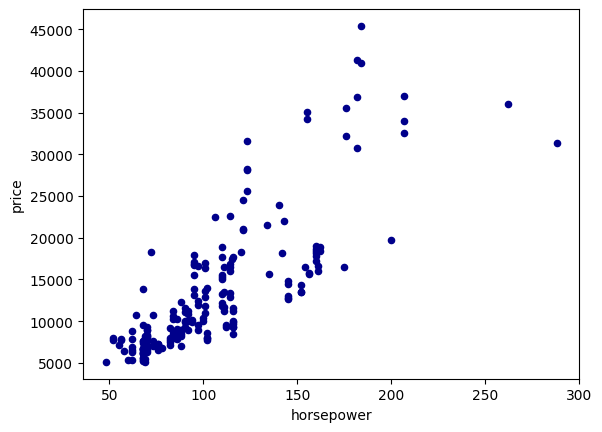

In [26]:
data.plot.scatter(y='price', x='horsepower', c= 'DarkBlue');



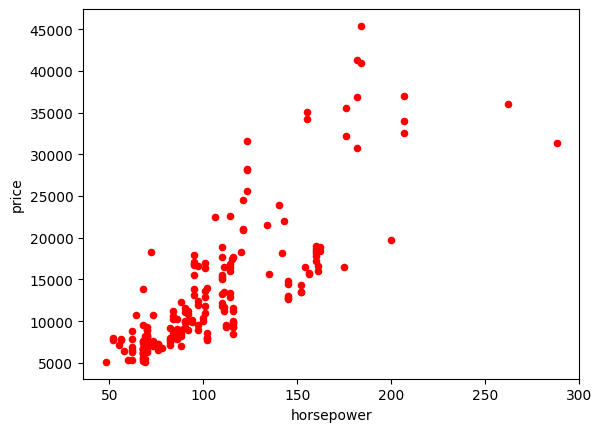

In [27]:
data.plot.scatter(y='price', x='horsepower', c= 'Red');



# Квантили, квартил, процентил и медиана

<div class="alert alert-info">

<!-- <b>Программа семинара: </b> -->
    
**Кванти́ль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

**Пример:** 80%-й квантиль выхода из строя станков на заводе равен три года - Это фраза значит, что 80% станков выходит из строя в течение первых трех лет, остальные 20% станков работают больше 3 лет


</div>




<p style="align: center;"><img align=center src="https://present5.com/presentation/3/120980285_176628086.pdf-img/120980285_176628086.pdf-43.jpg"  width=500></p>


<div class="alert alert-info">

**Квартиль** - это квантиль кратный 0.25 (четверти) 
    
    
**Процентиль** - это квантиль выраженный в процентах. Пример 40% процентиль или 0.40 квантиль

**Размах**, полученный из процентилей - растояние между двуменя процентилями    
    
</div>



In [28]:
np.quantile(data['price'], 0.5) # 

np.float64(10295.0)

In [29]:
data['price'].median()

np.float64(10295.0)

In [30]:
np.quantile(data['price'], 0.95)

np.float64(32472.399999999994)

# Дополнительных материалов

<div class="alert alert-info">

В качестве дополнительных материалов рекомендуется изучать самые популярные методы в Pandas

<p style="align: center;"><img align=center src="https://i0.wp.com/learnbyinsight.com/wp-content/uploads/2020/08/pandas-cheetsheet2.png?ssl=1_lesson.ipynb"  width=1000></p>

